In [116]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#train
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict, GridSearchCV

#Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


#Standart
from sklearn.preprocessing import StandardScaler, normalize, RobustScaler, OneHotEncoder

# from sklearn.preprocessing import PolynomialFeatures


#Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve, \
    average_precision_score, precision_recall_curve,plot_precision_recall_curve, mean_squared_error, mean_absolute_error

#Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# from sklearn.model_selection import learning_curve

# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# from sklearn.inspection import permutation_importance
#import warnings
#warnings.simplefilter(action="ignore")

# First Baseline

## Regression lineaire avec outliers

In [117]:
dataset1 = pd.read_csv("DATA/df_encod.csv", sep=',')
data = dataset1.drop('Unnamed: 0', axis =1)

### Train_test_split

In [138]:
# linear regression with all features 
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)
 

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print('Score:',score)

# Predict a Response and print it:
y_predicted = model.predict(X_test) 
print('Predicted response:', y_predicted, sep='\n')

# R2 
print("R2={}".format(model.score(X_test,y_test)))

# MAE
errors = abs(y_predicted - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Coef: [-2.93089201e+04 -2.86554669e+04  1.10518814e+03 -2.64109359e-01
  5.77981356e+01 -5.09462005e+01  9.78093446e+01  3.83347697e+04
  1.52086917e+03 -3.42533064e+04  3.41212780e+04 -4.25993060e+03
  2.87108984e+03]
Intercept: -2454170.05693534
Score: 0.655139698592631
Predicted response:
[125818.38815611 158408.50696476 187937.33954445 ... 249602.59245007
 256506.35863996 138341.17399863]
R2=0.6382507731982616
Mean Absolute Error: 50057.17
Mean Absolute Percentage Error : 28.85 %.


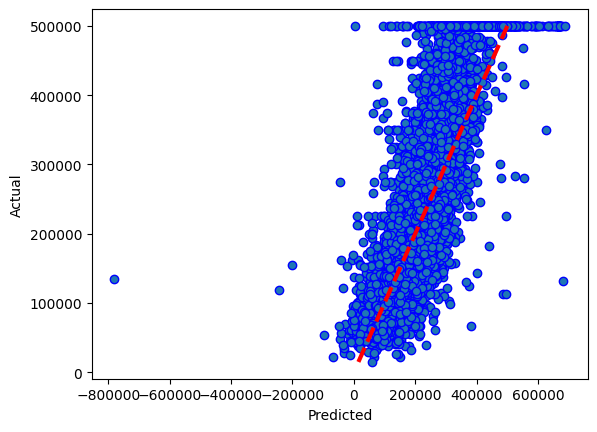

In [119]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() 

### Crossvalidate

In [120]:
log_model = LinearRegression()

# 5-Fold Cross validate model
scores  = cross_validate(log_model,  X, y, cv=5, scoring=('r2', 'neg_root_mean_squared_error','neg_mean_absolute_error'))

average_r2 = scores['test_r2'].mean()
average_rmse = -scores['test_neg_root_mean_squared_error'].mean()
average_mae = -scores['test_neg_mean_absolute_error'].mean()
print("Average R2: ", average_r2, "// Average RMSE: ", average_rmse, "// Average MAE:", average_mae)

Average R2:  0.6451464349194724 // Average RMSE:  68620.38411042705 // Average MAE: 49764.74394845379


# Iteration 2


## Regression lineaire  sans features  households , total_bedrooms

### Train_test_split

In [121]:
mycolumns =['longitude','latitude','housing_median_age','total_rooms', 
                         'population','median_income','median_house_value','location_<1H OCEAN','location_INLAND','location_ISLAND','location_NEAR BAY','location_NEAR OCEAN']

In [122]:
data1 = data[mycolumns]

In [123]:
# linear regression with all features 
X = data1.drop(['median_house_value'], axis=1)
y = data1['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_train, y_train)
 

#coef and intercept results
print('Coef:',model.coef_)
print('Intercept:',model.intercept_)
print('Score:',score)

# Predict a Response and print it:
y_predicted2 = model.predict(X_test) 
print('Predicted response:', y_predicted, sep='\n')

Coef: [-2.62030008e+04 -2.49557603e+04  1.08898599e+03  1.27994693e+01
 -2.08349786e+01  3.51209422e+04 -2.70246471e+04 -7.39507365e+04
  1.48888676e+05 -2.91174975e+04 -1.87957953e+04]
Intercept: -2166175.61406959
Score: 0.6296925043657344
Predicted response:
[144150.98339929 193607.17348767 379691.33801567 ... 215250.58406795
 484806.33587024 151264.71701015]


# Iteration 3

## Regression lineaire sans outliers

In [124]:
dataset2 = pd.read_csv("DATA/df_encod_sans_outliers.csv", sep=',')
data2 = dataset2.drop('Unnamed: 0', axis =1)

In [125]:
# define X, y
y = dataset2['median_house_value']
X = data2.drop('median_house_value', axis =1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
# Create an instance of a linear regression model and fit it to the data with the fit() function:
model2 = LinearRegression().fit(X, y) 

# The following section will get results by interpreting the created instance: 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq2 = model2.score(X, y)
print('coefficient of determination:', r_sq2)

# Print the Intercept:
print('intercept:', model2.intercept_)

# Print the Slope:
print('slope:', model2.coef_) 

# Predict a Response and print it:
y_pred2 = model2.predict(X_test)
print('Predicted response:', y_pred2, sep='\n')

coefficient of determination: 0.618593316227131
intercept: -1920466.9825578732
slope: [-2.28541279e+04 -2.10075867e+04  6.91829243e+02 -4.52124019e+00
  5.33700973e+01 -2.76142716e+01  6.25926669e+01  3.47952557e+04
 -1.68186921e+04 -5.73281905e+04  1.13147930e+05 -2.36915525e+04
 -1.53094948e+04]
Predicted response:
[104649.59563676 152246.92113122 309608.11254604 ...  97328.85575409
 288625.66905473 101096.7182357 ]


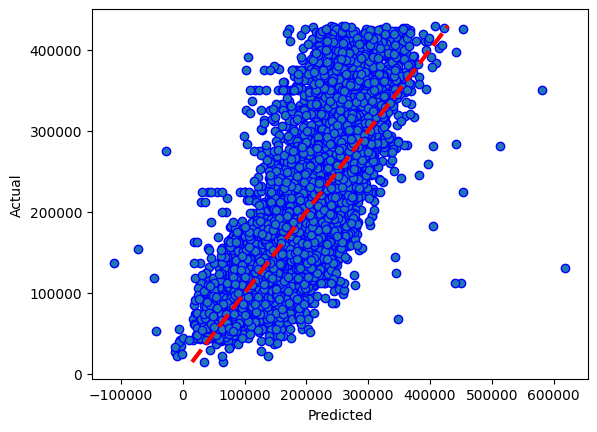

In [127]:
fig, ax = plt.subplots()
ax.scatter(y_pred2 , y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() 

# Iteration 4

## Random forest avec Outliers

In [128]:
X = data1.drop('median_house_value', axis =1)
y = dataset1['median_house_value']

In [129]:
# standardizing the features (scaling)
X = RobustScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

rf = RandomForestRegressor(n_estimators=10, random_state=20)

rf.fit(X_train, y_train)

pred = rf.predict(X_test)

# R2 
print("R2={}".format(rf.score(X_test,y_test)))

# MAE
errors = abs(pred - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.7595346023719922
Mean Absolute Error: 38221.13
Mean Absolute Percentage Error : 21.59 %.


# Iteration 5

## StandardScaler 

In [130]:
model_pipeline1 = make_pipeline(StandardScaler(), LinearRegression())

In [131]:
model_pipeline1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [132]:
prediction = model_pipeline1.predict(X_test)

In [133]:

# R2 
print("R2={}".format( model_pipeline1.score(X_test,y_test)))

# MAE
errors = abs(prediction - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2))

# MAPE
mape = 100 * (errors / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

R2=0.6291740043599693
Mean Absolute Error: 51792.2
Mean Absolute Percentage Error : 29.63 %.


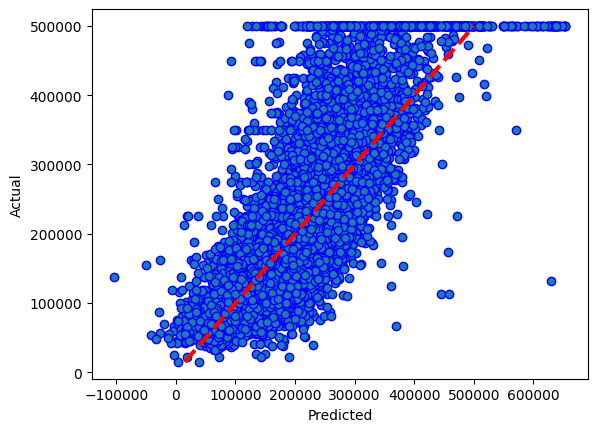

In [134]:
fig, ax = plt.subplots()
ax.scatter(prediction , y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show() 